<a href="https://colab.research.google.com/github/veiji/machine_learning/blob/main/notebooks/Regression_with_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learn with us: www.zerotodeeplearning.com

Copyright © 2021: Zero to Deep Learning ® Catalit LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Documentation links:

- [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb)
- [Numpy](https://docs.scipy.org/doc/)
- [Pandas](https://pandas.pydata.org/docs/getting_started/index.html)
- [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Matplotlib](https://matplotlib.org/)
- [Matplotlib Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
- [Seaborn](https://seaborn.pydata.org/)
- [Scikit-learn](https://scikit-learn.org/stable/user_guide.html)
- [Scikit-learn Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)
- [Scikit-learn Flow Chart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

# Regression with Scikit Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/zerotodeeplearning/ztdl-masterclasses/master/data/"

## Regression

In [3]:
df = pd.read_csv(url + 'weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


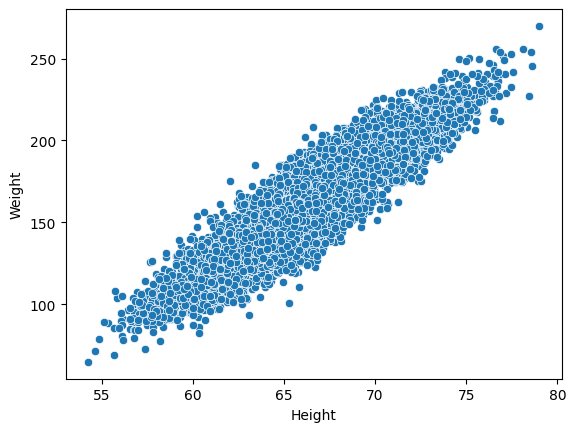

In [5]:
sns.scatterplot(data=df,
                x='Height',
                y='Weight');

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
X = df[['Height']].values
y = df['Weight'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
model.score(X_train, y_train)

0.8544074009765417

In [12]:
model.score(X_test, y_test)

0.8581952493935256

In [14]:
y_pred_test = model.predict(X_test)

## Plot the line of best fit

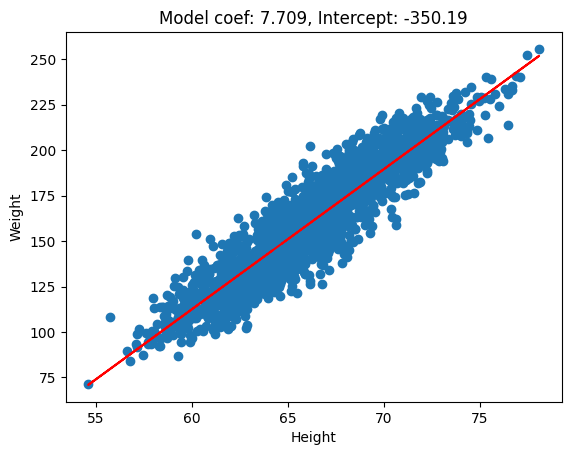

In [15]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_test, color='red')
plt.title("Model coef: {:0.3f}, Intercept: {:0.2f}".format(model.coef_[0], model.intercept_))
plt.xlabel("Height")
plt.ylabel("Weight");

### Compare true and predicted values ($y$ vs $\hat{y}$)

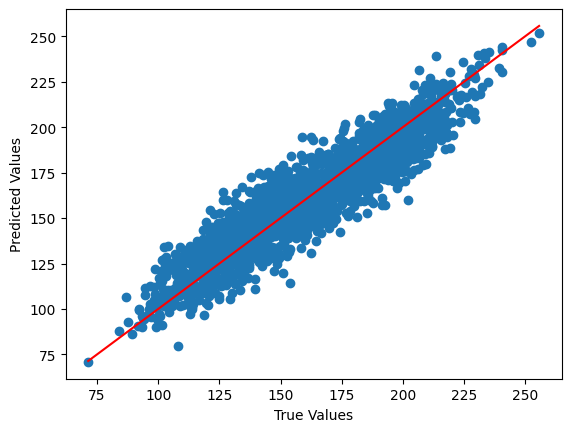

In [16]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

m = y_test.min()
M = y_test.max()

plt.plot((m, M), (m, M), color='red');

### Exercise 1: multiple features

More features: `sqft`, `bdrms`, `age`, `price`

- load the dataset `housing-data.csv`
- visualize the data using `sns.pairplot`
- add more columns in the feature definition `X = ...`
- train and evaluate a Linear regression model to predict `price`
- compare predictions with actual values
- is your score good?
- change the `random_state` in the train/test split function. Does the score stay stable?

In [17]:
df = pd.read_csv(url + 'housing-data.csv')

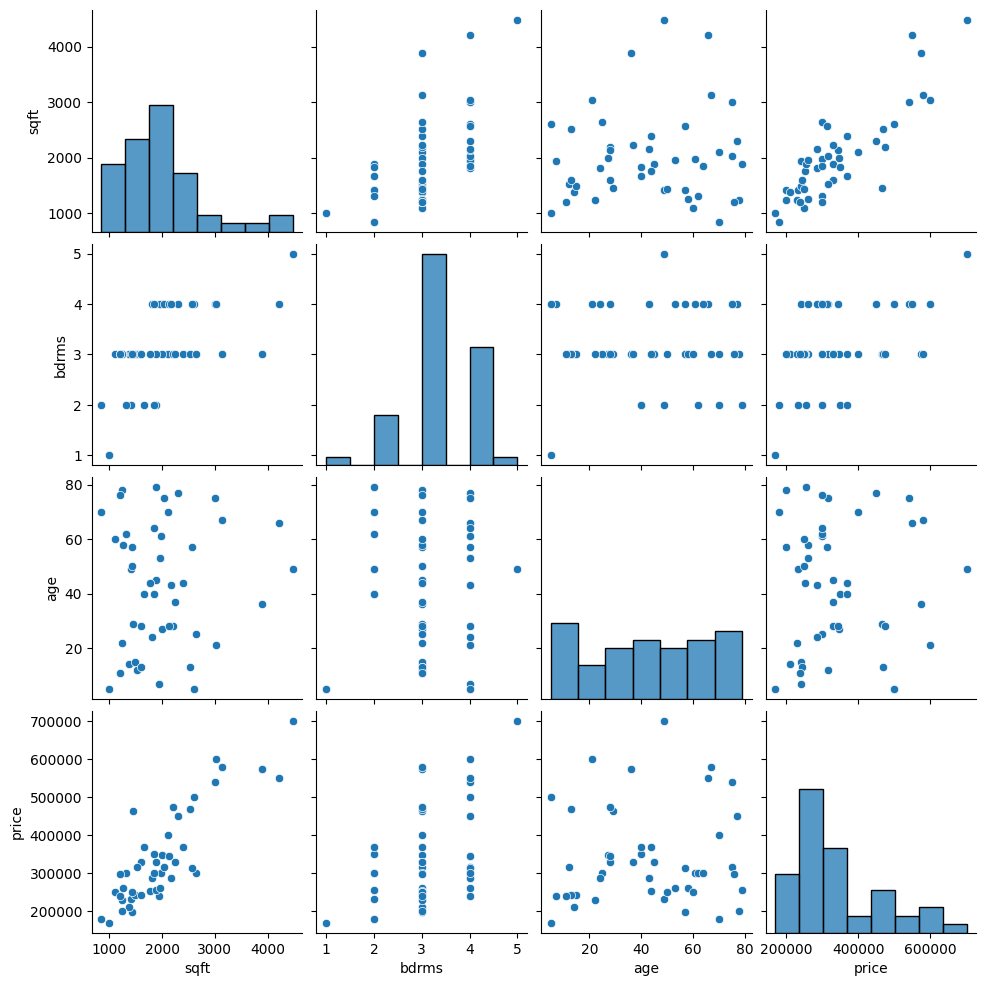

In [18]:
sns.pairplot(df)

Dropping only "price" feature (column).


In [22]:
X = df.drop('price', axis=1).values
y = df['price'].values

Using 80% of the data to train the model.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3)

In [24]:
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

Scoring the model on the train and test data.
It's expected that both scores have similar values.
We could check that by changing the `random_state` from the spliting data, the scores kept varying, so further investigation is required.

In [32]:
model.score(X_train, y_train)

0.7215964601888321

In [33]:
model.score(X_test, y_test)

0.7496781768961648

Ploting the true and predicted values.
It's expected that the pointes are close to the red line.

In [34]:
y_pred_test = model.predict(X_test)

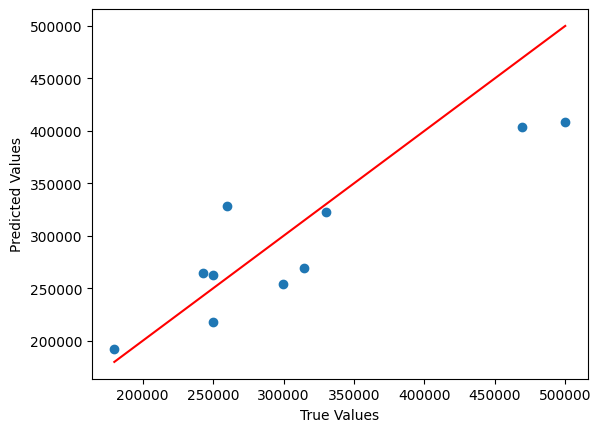

In [35]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

m = y_test.min()
M = y_test.max()

plt.plot((m, M), (m, M), color='red');

### Exercise 2

- Encapsulate the split/train/evaluate steps into a single function with signature:

```python
def train_eval(random_state=0):
  # YOUR CODE HERE

  return train_score, test_score
```
- Compare the performance of the model for several random states

- Bonus points if you plot a histogram of train and test scores

In [36]:
from sklearn.metrics import r2_score

In [46]:
def train_eval(random_state=0):
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state)

  model = LinearRegression()

  model.fit(X_train, y_train)

  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  train_score = r2_score(y_train, y_pred_train)
  test_score = r2_score(y_test, y_pred_test)

  return train_score, test_score

train_eval(0)

(0.7411959910367354, 0.6497683467924655)

In [47]:
random_states = range(0, 500)
scores = [train_eval(random) for random in random_states]


Plotting the histogram of train and test scores

In [50]:
dfscores = pd.DataFrame(scores, index=random_states, columns=['train_score', 'test_score'])
dfscores

,train_score,test_score
0,0.741196,0.649768
1,0.802904,0.273421
2,0.704821,0.817130
3,0.721596,0.749678
4,0.722702,0.741336
...,...,...
495,0.842844,0.097461
496,0.761054,0.390648
497,0.760303,0.431036
498,0.713668,0.613044


<Axes: title={'center': 'Model sampling'}, ylabel='Frequency'>

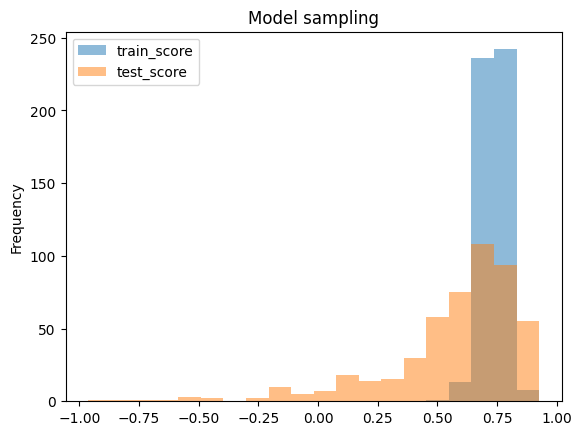

In [49]:
dfscores.plot.hist(alpha=0.5, bins=20, title="Model sampling")

### Exercise 3:

Let's see how easy it is to test different models on a larger dataset.

Here we load the California Housing dataset from Scikit Learn. Your goal is to define a function that:
- trains a model
- plots `y_pred` vs `y_true`

You can skip doing train/test split for this exercise.

Then compare the performance of the models given below:
- `sklearn.linear_model.LinearRegression`
- `sklearn.ensembleGradient.BoostingRegressor`
- `sklearn.ensembleRandom.ForestRegressor`
- `sklearn.linear_model.Ridge`
- `sklearn.linear_model.Lasso`

Function signature:

```python
def train_eval_plot(model):
  # YOUR CODE HERE

```

In [53]:
from sklearn.datasets import fetch_openml, fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso

In [54]:
dataset = fetch_california_housing()
y = dataset.target

Xdf = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X = Xdf.values

Xdf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [55]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [57]:
def train_eval_plot(model):
  model.fit(X, y)
  y_pred = model.predict(X)

  plt.figure()
  plt.scatter(y, y_pred)
  plt.xlabel("True Value")
  plt.ylabel("Predicted Value")

  m = y.min()
  M = y.max()

  plt.plot((m, M), (m, M), color = "red")
  plt.title(model.__class__.__name__)


It looks like the RandomForestRegressor would be the one the better fits.

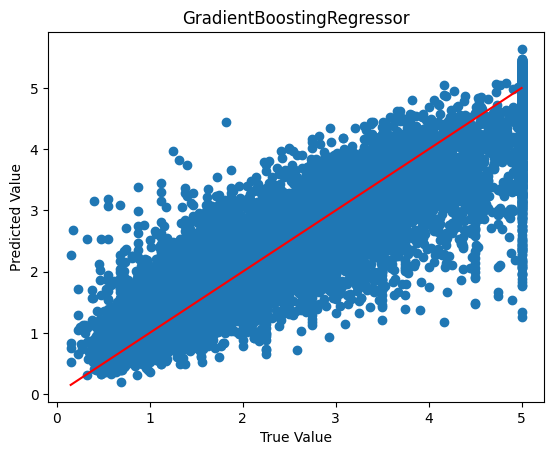

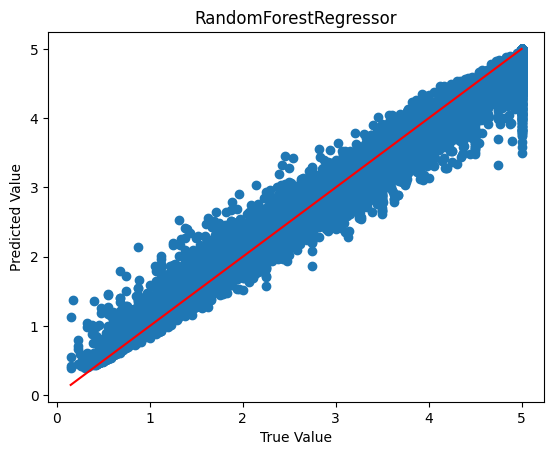

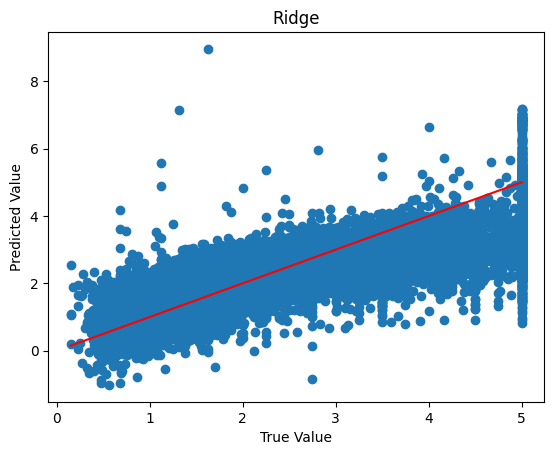

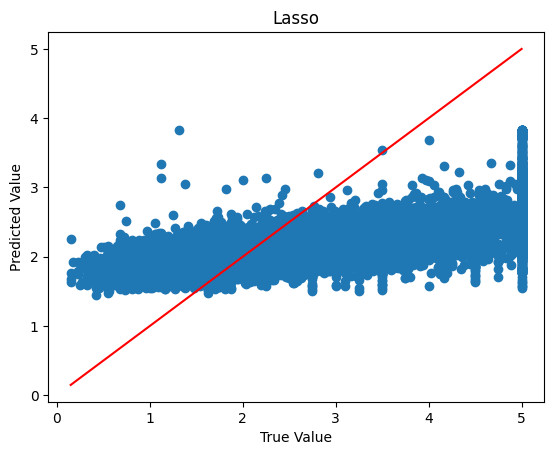

In [59]:
models = [
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    Ridge(),
    Lasso()
]

for model in models:
  train_eval_plot(model)